# >>>> Auditoria de calidad datos de CoinMarketCap <<<<

# 1. Estado Inicial

# 2. Modulos necesarios para realizar los calculos

In [4]:
#agregar directorio de scripts como referencia
import sys
sys.path.append('scripts/')
#importar funciones creadas
import data_checker as dc
#libreria para el manejo de dataframes
import pandas as pd
#Libreria para plotear (graficar) 
import matplotlib.pyplot as plt
#para ver grafico en jupyter
%matplotlib inline
#Libreria html para mostrar información
from IPython.core.display import HTML

# 3. Evolución de registros en BD de CoinMarketCap

Supuesto inicial:
* El cantidad de registros de precios, volumen y capitalización de mercado debería tener el mismo comportamiento

# 3.1 Configuración de inicio

In [5]:
#directorio donde se encuentran las bases de datos
full_path = '2018-11-01/'
#fecha de cierre de backtest
first_close = '2018-06-30'
#fecha de cierre de resultados
second_close = '2018-09-30'

# 3.2 Construye DataFrame con resultados

In [6]:
df1 = dc.quantity_evolution(full_path, first_close)
df2 = dc.quantity_evolution(full_path, second_close)

#### Total of files stored in path:2025 ####
#### Last date of Data Frames:2018-06-30
---> PRICE DETAIL <--
Price_cum_sum:1439
Price_none_value:586
Total_files:2025
---> VOLUME DETAIL <--
Volume_cum_sum:1439
Volume_none_value:586
Total_files:2025
---> MARKET CAP DETAIL <--
MarketCap_cum_sum:1261
MarketCap_none_value:764
Total_files:2025
 
#### Total of files stored in path:2025 ####
#### Last date of Data Frames:2018-09-30
---> PRICE DETAIL <--
Price_cum_sum:1863
Price_none_value:162
Total_files:2025
---> VOLUME DETAIL <--
Volume_cum_sum:1863
Volume_none_value:162
Total_files:2025
---> MARKET CAP DETAIL <--
MarketCap_cum_sum:1532
MarketCap_none_value:493
Total_files:2025
 


In [7]:
#data frame d1: 30/06/2018
display(HTML(df1.to_html()))

,MarketCap,Price,Volume,Price_cum_sum,Volume_cum_sum,MarketCap_cum_sum
Date,,,,,,
2013-04-28,6.0,6.0,0.0,6.0,0.0,6.0
2013-04-29,0.0,0.0,0.0,6.0,0.0,6.0
2013-04-30,0.0,0.0,0.0,6.0,0.0,6.0
2013-05-01,0.0,0.0,0.0,6.0,0.0,6.0
2013-05-02,0.0,0.0,0.0,6.0,0.0,6.0
2013-05-03,3.0,3.0,0.0,9.0,0.0,9.0
2013-05-04,0.0,0.0,0.0,9.0,0.0,9.0
2013-05-05,0.0,0.0,0.0,9.0,0.0,9.0
2013-05-06,0.0,0.0,0.0,9.0,0.0,9.0


In [8]:
#data frame d2: 30/09/2018
display(HTML(df2.to_html()))

,MarketCap,Price,Volume,Price_cum_sum,Volume_cum_sum,MarketCap_cum_sum
Date,,,,,,
2013-04-28,6.0,6.0,0.0,6.0,0.0,6.0
2013-04-29,0.0,0.0,0.0,6.0,0.0,6.0
2013-04-30,0.0,0.0,0.0,6.0,0.0,6.0
2013-05-01,0.0,0.0,0.0,6.0,0.0,6.0
2013-05-02,0.0,0.0,0.0,6.0,0.0,6.0
2013-05-03,3.0,3.0,0.0,9.0,0.0,9.0
2013-05-04,0.0,0.0,0.0,9.0,0.0,9.0
2013-05-05,0.0,0.0,0.0,9.0,0.0,9.0
2013-05-06,0.0,0.0,0.0,9.0,0.0,9.0


# 3.3 Gráficas de resultados (variación diaria)

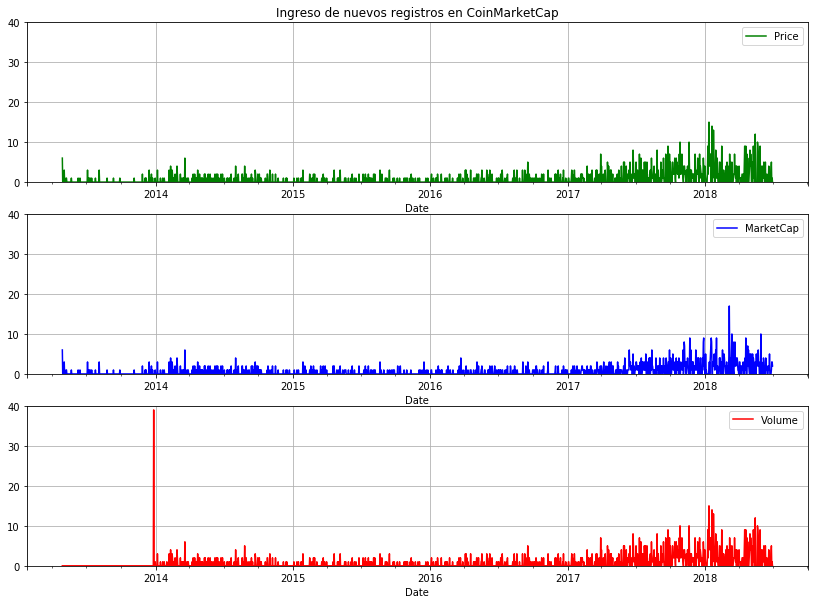

In [9]:
#data frame d1: 30/06/2018
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14,10))
df1['Price'].plot(ax=axes[0], color='green', label='Price', grid=True)
df1['MarketCap'].plot(ax=axes[1], color='blue', label='MarketCap', grid=True)
df1['Volume'].plot(ax=axes[2], color='red', label='Volume', grid=True)
axes[0].set_title('Ingreso de nuevos registros en CoinMarketCap')
axes[0].set_ylim(0, 40)
axes[1].set_ylim(0, 40)
axes[2].set_ylim(0, 40)
axes[0].legend(loc='upper right')
axes[1].legend(loc='upper right')
axes[2].legend(loc='upper right')

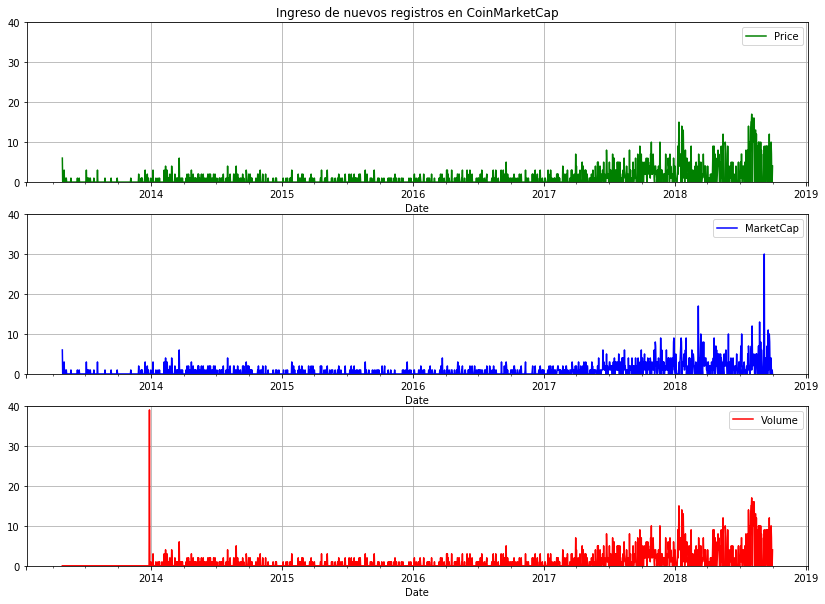

In [10]:
#data frame d2: 30/09/2018
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14,10))
df2['Price'].plot(ax=axes[0], color='green', label='Price', grid=True)
df2['MarketCap'].plot(ax=axes[1], color='blue', label='MarketCap', grid=True)
df2['Volume'].plot(ax=axes[2], color='red', label='Volume', grid=True)
axes[0].set_title('Ingreso de nuevos registros en CoinMarketCap')
axes[0].set_ylim(0, 40)
axes[1].set_ylim(0, 40)
axes[2].set_ylim(0, 40)
axes[0].legend(loc='upper right')
axes[1].legend(loc='upper right')
axes[2].legend(loc='upper right')

# 3.4 Gráficas de resultados (variación acumulada)

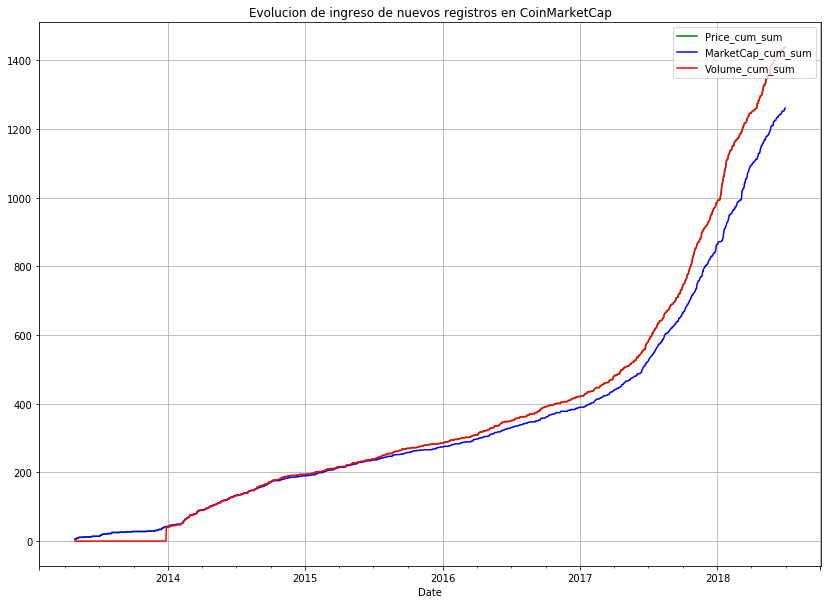

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(14,10))
df1['Price_cum_sum'].plot(color='green', label='Price_cum_sum', grid=True)
df1['MarketCap_cum_sum'].plot(color='blue', label='MarketCap_cum_sum', grid=True)
df1['Volume_cum_sum'].plot(color='red', label='Volume_cum_sum', grid=True)
axes.set_title('Evolucion de ingreso de nuevos registros en CoinMarketCap')
axes.legend(loc='upper right')

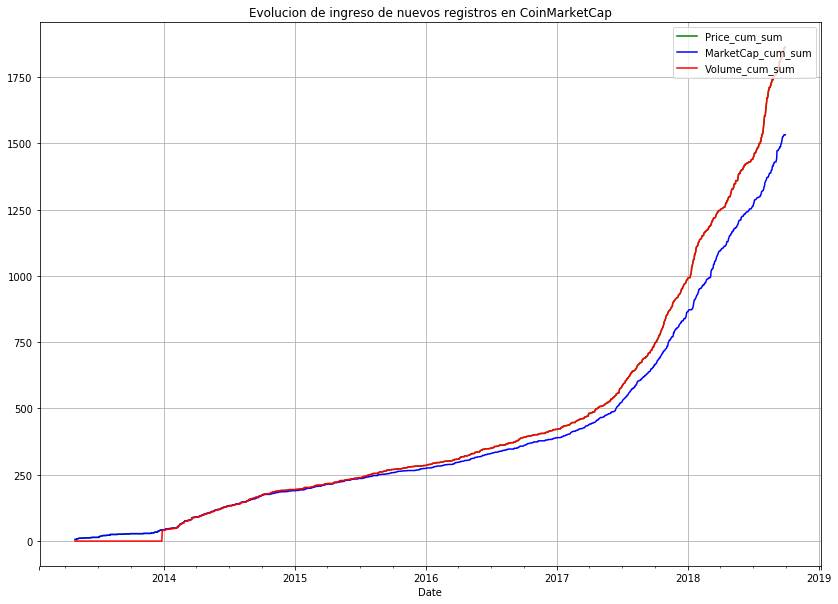

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(14,10))
df2['Price_cum_sum'].plot(color='green', label='Price_cum_sum', grid=True)
df2['MarketCap_cum_sum'].plot(color='blue', label='MarketCap_cum_sum', grid=True)
df2['Volume_cum_sum'].plot(color='red', label='Volume_cum_sum', grid=True)
axes.set_title('Evolucion de ingreso de nuevos registros en CoinMarketCap')
axes.legend(loc='upper right')

* NO se cumple la hipotesis!
* Los registros de precios, volumen y capitalización de mercado de un activo no son uniformes. 
* La anormalidad no es solo con antiguos registros pues también se aprecia en los últimos meses

# 4. Chequeo de filtros de calidad

# 4.1 Totales

In [21]:
check1 = dc.apply_filters(full_path, first_close)
check2 = dc.apply_filters(full_path, second_close)

#### Total of files stored in path:2025 ####
#### Last date of Data Frames:2018-06-30
---> DATAFRAMES(DF) DETAIL <--
F1:Empty DF:586
F2:DF w/less than 90 days of history:192
F3:DF w/difference between len(DF) and days between (df.end - df.start):438
F4:Date of close is not within DF:18
---> VARIABLES(Price, Volume, MarketCap) DETAIL <--
F5a:Assets with NAN(0) values in Price colum (from 1 day):0
F5b:Assets with NAN(0) values in Volume colum (from 1 day):42
F5c:Assets with NAN(0) values in MarketCap colum (from 1 day):949
---> LIQUIDITY(Volume) DETAIL <--
F6:Assets w/25% of days over a daily transaction amount of US$40.000):682
 
#### Total of files stored in path:2025 ####
#### Last date of Data Frames:2018-09-30
---> DATAFRAMES(DF) DETAIL <--
F1:Empty DF:162
F2:DF w/less than 90 days of history:418
F3:DF w/difference between len(DF) and days between (df.end - df.start):562
F4:Date of close is not within DF:49
---> VARIABLES(Price, Volume, MarketCap) DETAIL <--
F5a:Assets with NAN(0) v

# 4.2 Detalles

In [22]:
df1 = pd.DataFrame.from_dict(check1[1], orient='index')
df1 = df1.transpose()
df1 = df1.reindex(sorted(df1.columns), axis=1)
display(HTML(df1.to_html()))

,f01,f02,f03,f04,f05a,f05b,f05c,f06
0,NDX,DEV,GCN,BIRDS,None,NVC,DEV,GCN
1,CRD,PAI,NVC,CTL,None,XJO,GET,NVC
2,XCEL,FT,JIYO,LKK,None,ORB,EVN,EFL
3,MCT,UUU,TTC,ERC20,None,IXC,JIYO,TTC
4,PYX,ABYSS,INFX,EDT,None,ARG,SPHTX,FT
5,QUAN,ATC,XBC,MCC,None,XRP,GBYTE,TIG
6,KLKS,ZIPT,GRID,NOTE,None,NXT,TTC,SPK
7,ACDC,DIG,NXC,CEL,None,LTC,MCAP,INFX
8,VIVID,DGX,NPX,ATCC,None,UNO,GTC,VRM
9,EST,BETR,POS,IBTC,None,ANC,TIG,ELTCOIN


In [23]:
df2 = pd.DataFrame.from_dict(check2[1], orient='index')
df2 = df2.transpose()
df2 = df2.reindex(sorted(df2.columns), axis=1)
display(HTML(df2.to_html()))

,f01,f02,f03,f04,f05a,f05b,f05c,f06
0,NDX,XCEL,GCN,POS,None,NVC,DEV,GCN
1,CRD,MCT,NVC,DIG,None,XJO,GET,EVN
2,PYX,KLKS,JIYO,MYST,None,ORB,EVN,EFL
3,QUAN,ACDC,TTC,LTCR,None,IXC,JIYO,JIYO
4,AGLT,VIVID,EST,VLC,None,ARG,SPHTX,TTC
5,DEX,EST,INFX,ECOB,None,XRP,PAI,KLKS
6,SHPING,BBS,XBC,ICOB,None,NXT,GBYTE,MCAP
7,FOX,IOG,MBRS,BRIT,None,LTC,TTC,FT
8,QNO,ZXC,GRID,GEERT,None,UNO,KLKS,VIVID
9,ALC,ABLX,ECASH,HBT,None,ANC,MCAP,TIG
